## Exploration_RS7_2_2

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
!pwd

/aiffel/aiffel


### (1) 데이터 가져오기
#### [Bike Sharing Demand] https://www.kaggle.com/c/bike-sharing-demand/data

In [3]:
path = "~/data/data/bike-sharing-demand/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
submission = pd.read_csv(path + "sampleSubmission.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [6]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


In [7]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train.iloc[:,1:].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

#### 0) pd. to_datetime

In [10]:
# dtype: object 
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [11]:
# object -> datetime64[ns]
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [15]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

#### 1) split 

In [16]:
# train['datetime'][0]

In [17]:
# train['datetime'][0].split()[0].split('-')[0]

In [18]:
# train['datetime'][0].split()[1].split(':')[2]

In [19]:
'''
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['min'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[2])
'''

"\ntrain['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])\ntrain['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])\ntrain['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])\ntrain['hour'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[0])\ntrain['min'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[1])\ntrain['second'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[2])\n"

In [20]:
# feature 생성 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [21]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [22]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

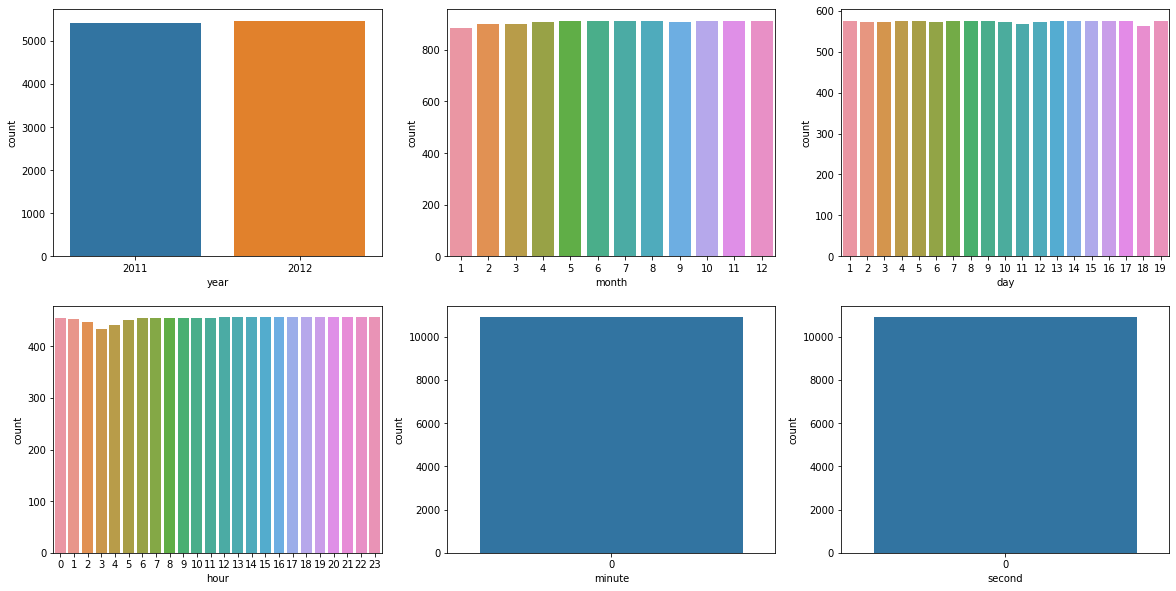

In [24]:
figure, axes = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)
sns.countplot(x='year', data=train, ax=axes[0, 0])
sns.countplot(x='month', data=train, ax=axes[0, 1])
sns.countplot(x='day', data=train, ax=axes[0, 2])
sns.countplot(x='hour', data=train, ax=axes[1, 0])
sns.countplot(x='minute', data=train, ax=axes[1, 1])
sns.countplot(x='second', data=train, ax=axes[1, 2])

In [27]:
train['minute'].unique()

array([0])

In [28]:
train['second'].unique()

array([0])

In [29]:
train['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [30]:
train['hour'].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [ ]:
'''
figure, axes = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count',data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count',data=train, ax=axes[0, 2])
sns.barplot(x='hour', y='count',data=train, ax=axes[1, 0])
sns.barplot(x='min', y='count',data=train, ax=axes[1, 1])
sns.barplot(x='second', y='count',data=train, ax=axes[1, 2])
'''

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [31]:
# 상관관계 분석
corr_results = train.corr()
(np.abs(corr_results['count'])).sort_values(ascending = False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year          0.260403
month         0.166862
season        0.163439
weather       0.128655
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday       0.005393
minute             NaN
second             NaN
Name: count, dtype: float64

In [32]:
train = train.drop(['casual', 'registered','datetime'], axis = 1)

In [33]:
X = train.drop('count', axis = 1)
y = train.loc[:,'count']

In [34]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.2, random_state =42)

### (5) LinearRegression 모델 학습

In [35]:
model = LinearRegression()
model.fit(X_tr, y_tr)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

* X_test 대신 X_val로 변수명을 지정하고 수행

In [36]:
y_pred = model.predict(X_val)

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared = False)
print(mse)
print(rmse)

19945.370053754035
141.22807813517124


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

Text(0, 0.5, 'count')

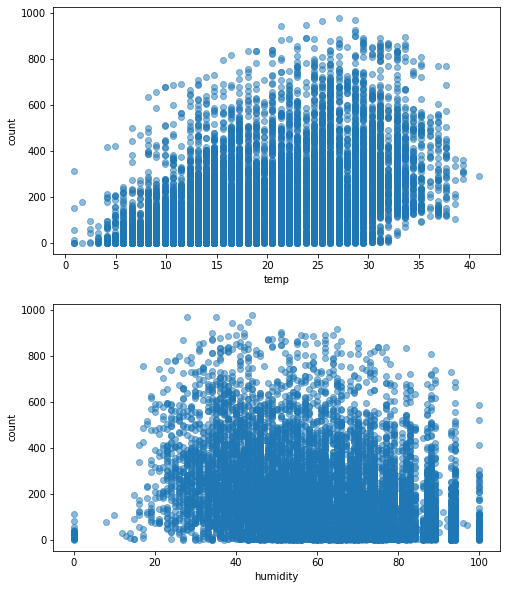

In [38]:
figure, axes = plt.subplots(2, 1, figsize=(8,10))
plt.subplot(2, 1, 1)   
plt.scatter(X['temp'], y, alpha = 0.5)
plt.xlabel('temp')
plt.ylabel('count')

plt.subplot(2, 1, 2)   
plt.scatter(X['humidity'], y, alpha = 0.5)
plt.xlabel('humidity')
plt.ylabel('count')